# Deep Learning Model 

First Deep Learning model. The goal is to train a model that i can later apply for other projects. 

Dataset is Watkins Marine Mammal dataset.

The goal of the model is ...




---




Of all data we'll use:
- 70% for training
- 15% for validation
- 15% for test

## Setting up

In [1]:
# pip install block


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import random
import os

import torch

In [3]:
ROOT_PATH = Path("..")  

AUDIO_DIR = ROOT_PATH / "Data" / "Audio"
ANNOT_DIR = ROOT_PATH / "Data" / "Annotations"
SPECT_DIR = ROOT_PATH / "Data" / "Spectrograms"

ANNOT_FILE = ANNOT_DIR / "audio_annotations.csv"

train_df = pd.read_csv(ANNOT_DIR / "train.csv")
val_df   = pd.read_csv(ANNOT_DIR / "val.csv")
test_df  = pd.read_csv(ANNOT_DIR / "test.csv")

import sys
project_root = ROOT_PATH
sys.path.append(str(project_root))

Splitting into train, val, test. Done

In [4]:
# from src.split import split_dataset
df = pd.read_csv(ANNOT_FILE)
# sys.path.append("..")
# train_df, val_df, test_df = split_dataset(ANNOT_FILE, ANNOT_DIR)

Generating spectograms. Done

In [5]:
# from src.preprocess.create_spectrograms import main as generate_all_spectrograms
# generate_all_spectrograms()

Testing if correct setup

In [6]:
print(len(df))
print("Train:", len(train_df))
print("Val:  ", len(val_df))
print("Test: ", len(test_df))

15407
Train: 10784
Val:   2311
Test:  2312


## Showcase

SpermWhale ---  shape: (1, 128, 275)
SpermWhale ---  shape: (1, 128, 6683)
StripedDolphin ---  shape: (1, 128, 110)


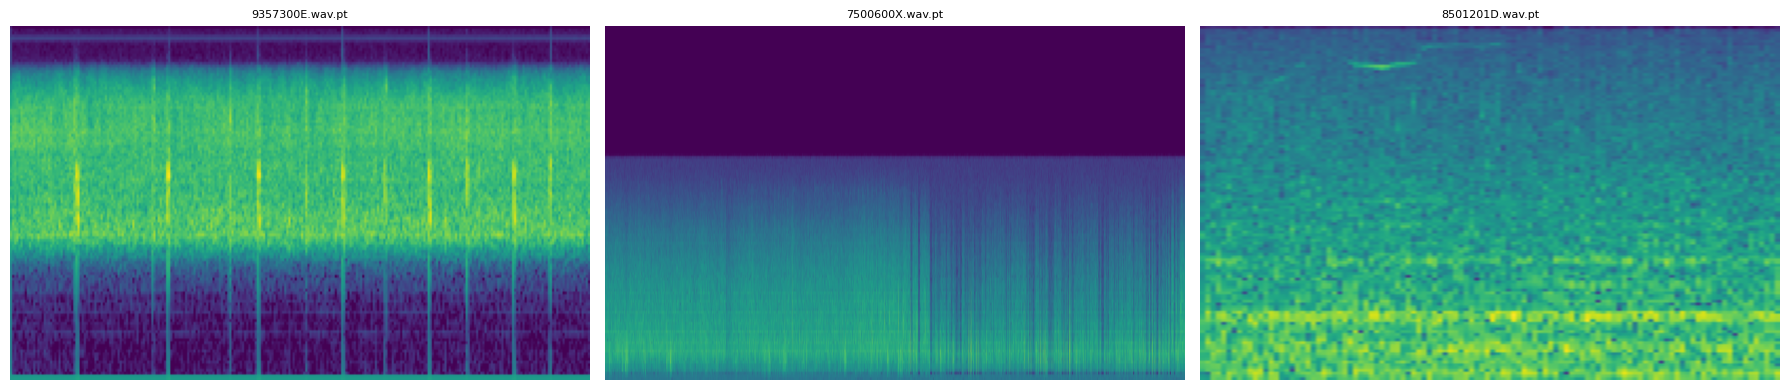

In [7]:
base_dir = ROOT_PATH / "Data" / "Spectrograms" / "train"

all_files = []
for root, dirs, files in os.walk(base_dir):
    for f in files:
        if f.endswith(".pt"):
            relative_path = os.path.join(root, f)
            all_files.append(relative_path)

if len(all_files) < 3:
    raise ValueError("Not enough .pt files found.")

# Select 3 random spectrograms
samples = random.sample(all_files, 3)

# Plot
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

for ax, path in zip(axes, samples):
    tensor = torch.load(path)

    species_name = os.path.basename(os.path.dirname(path))
    # Print the tensor shape and name
    print(f"{species_name} ---  shape: {tuple(tensor.shape)}")

    # Convert tensor to 2D for plotting
    if tensor.dim() == 2:
        img = tensor
    elif tensor.dim() == 3:
        # assume [C, H, W]
        img = tensor[0]  
    else:
        raise ValueError(f"Unexpected tensor shape: {tensor.shape}")

    ax.imshow(img.numpy(), aspect="auto", origin="lower", cmap="viridis")
    ax.set_title(os.path.basename(path), fontsize=8)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [8]:
import torchaudio
from IPython.display import Audio
import os

def play_audio_from_spectrogram_path(spec_path, audio_root):
    """
    spec_path:     path to the .pt file
    audio_root:    root folder where .wav files are located (Data/Audio)
    """
    # 1. Extract filename without .pt
    base = os.path.basename(spec_path)              # e.g. '123.wav.pt'
    wav_name = base.replace(".pt", "")              # '123.wav'

    # 2. Get species folder from spectrogram path
    species = os.path.basename(os.path.dirname(spec_path))

    # 3. Build full path to audio file
    wav_path = os.path.join(audio_root, species, wav_name)

    if not os.path.exists(wav_path):
        raise FileNotFoundError(f"Audio file not found: {wav_path}")

    # 4. Load audio
    waveform, sr = torchaudio.load(wav_path)

    # 5. Return playable audio widget
    return Audio(waveform.numpy(), rate=sr)


In [9]:
audio_root = ROOT_PATH / "Data" / "Audio"

# Example spectrogram path
spec_path = "Data/Spectrograms/train/White_beakedDolphin/5903700M.wav.pt"

play_audio_from_spectrogram_path(spec_path, audio_root)

RuntimeError: Could not load libtorchcodec. Likely causes:
          1. FFmpeg is not properly installed in your environment. We support
             versions 4, 5, 6, 7, and 8.
          2. The PyTorch version (2.9.1+cpu) is not compatible with
             this version of TorchCodec. Refer to the version compatibility
             table:
             https://github.com/pytorch/torchcodec?tab=readme-ov-file#installing-torchcodec.
          3. Another runtime dependency; see exceptions below.
        The following exceptions were raised as we tried to load libtorchcodec:
        
[start of libtorchcodec loading traceback]
FFmpeg version 8: Could not load this library: C:\Users\beno7\AppData\Local\Programs\Python\Python314\Lib\site-packages\torchcodec\libtorchcodec_core8.dll
FFmpeg version 7: Could not load this library: C:\Users\beno7\AppData\Local\Programs\Python\Python314\Lib\site-packages\torchcodec\libtorchcodec_core7.dll
FFmpeg version 6: Could not load this library: C:\Users\beno7\AppData\Local\Programs\Python\Python314\Lib\site-packages\torchcodec\libtorchcodec_core6.dll
FFmpeg version 5: Could not load this library: C:\Users\beno7\AppData\Local\Programs\Python\Python314\Lib\site-packages\torchcodec\libtorchcodec_core5.dll
FFmpeg version 4: Could not load this library: C:\Users\beno7\AppData\Local\Programs\Python\Python314\Lib\site-packages\torchcodec\libtorchcodec_core4.dll
[end of libtorchcodec loading traceback].